In [ ]:
from pathlib import Path
import pandas as pd

# Prepare dataset

In [ ]:
# Unzip dataset from https://www.kaggle.com/datasets/hbaflast/french-twitter-sentiment-analysis
! unzip archive.zip

Archive:  archive.zip
  inflating: french_tweets.csv       


In [ ]:
from sklearn.utils import shuffle

df = pd.read_csv('french_tweets.csv')
data = df[['text', 'label']]


#Replace 4 with 1 which is Positive sentence
#Take 5K from Neg/Pos to create test dataset
data_neg = data[data['label'] == 0]
data_neg = data_neg.sample(455000)
test_data_neg = data_neg[:5000]
data_neg = data_neg[5000:]


data_pos = data[data['label'] == 1]
data_pos = data_pos.sample(455000)
test_data_pos = data_pos[:5000]
data_pos = data_pos[5000:]

#Create train dataset with the 900K samples
train_dataset = pd.concat([data_pos, data_neg])
train_dataset = shuffle(train_dataset)
train_dataset.head()

,text,label
374405,Probablement rien faire avant que je sois mis ...,0
214534,- couper les ponts!!! Mais je suis surpris que...,0
326266,Je sais que c'est la nuit d'origine ce soir et...,0
1380592,Faire les actes avec les amis et regarder les ...,1
533007,12 minutes jusqu'à knockoff ... je ne peux pas...,0


In [ ]:
train_dataset.shape

(900000, 2)

In [ ]:
#Create test dataset
test_dataset = pd.concat([test_data_pos, test_data_neg])
test_dataset = shuffle(test_dataset)
test_dataset.head()

,text,label
1178410,J'ai juste fait des folies dans le jardin avec...,1
464975,"Je viens de commencer ici, et je veux sortir",0
1071933,Ce sera dans la prochaine semaine ou deux! Réa...,1
823540,Je suis pour la kathy la plus heureusement bén...,1
348935,"Aww! Pauvre harry ..! Hahaa, n'avez-vous pas p...",0


In [ ]:
test_dataset.shape

(10000, 2)

In [ ]:
#Save both datasets as .csv
train_dataset.to_csv('train_data_tweetsFR.csv',index=False)
test_dataset.to_csv('test_data_tweetsFR.csv',index=False)

# Let's look at data

In [ ]:
train_dataset = pd.read_csv('train_data_tweetsFR.csv')

In [ ]:
df_number_of_categories = train_dataset.groupby(['label']).label.count().reset_index(name='Count')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

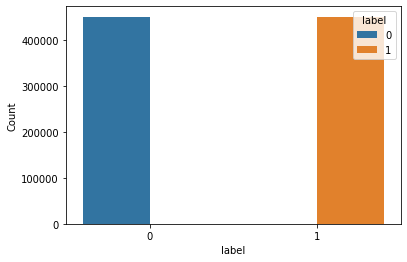

In [ ]:
sns.barplot(data=df_number_of_categories, y='Count', x='label', hue='label')

- The train dataset is perfectly balanced
- It contains two labels wherest **0 - negative**, **1 - positive**

In [ ]:
df_number_of_categories

,label,Count
0,0,450000
1,1,450000


- Test dataset is balanced with 5000 samples from negative and 5000 samples from positive

# Tokenize sentences and remove puncuation
- I won't be using this method later, but it's good for visual text analysis

In [ ]:
import itertools
import nltk
from textblob import TextBlob

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return tweet_blob.words

# Most common words in train dataset

In [ ]:
train_dataset['Words'] = train_dataset['text'].apply(form_sentence)

In [ ]:
words = list(itertools.chain(*train_dataset.Words))

In [ ]:
word_freq = nltk.FreqDist(words)

In [ ]:
word_freq

In [ ]:
#How many unique words train dataset contains
len(word_freq)

257199

In [ ]:
#Longest tweet
max(train_dataset.Words.apply(len))

77

In [ ]:
#Average tweet length
train_dataset.Words.str.len().mean()

13.639493333333334

- The train dataset contains **257199** unique words
- The longest tweet is **77** words long
- The average tweet is **14** words long

# Histogram of words in tweet

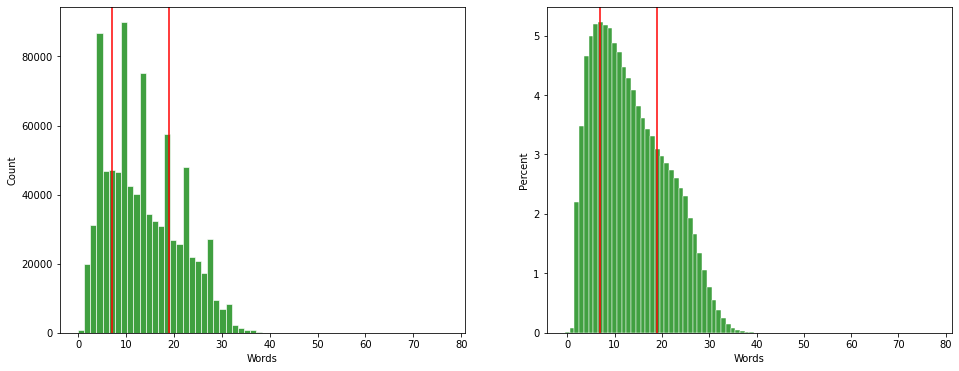

In [ ]:
fig = plt.figure(figsize=(16,6))
fig = plt.subplot(1,2,1)
sns.histplot(train_dataset.Words.apply(len), bins=60, edgecolor='white', color='green')
plt.axvline(train_dataset.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_dataset.Words.apply(len).quantile(0.75), color='red')

fig = plt.subplot(1,2,2)
sns.histplot(train_dataset.Words.apply(len), bins=60, edgecolor='white', color='green', stat="percent", discrete=True)
plt.axvline(train_dataset.Words.apply(len).quantile(0.25), color='red')
plt.axvline(train_dataset.Words.apply(len).quantile(0.75), color='red')

- The interquartile range is between 7 and 19 words

# Let's create a Word Cloud for most common words

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# With Stopwords

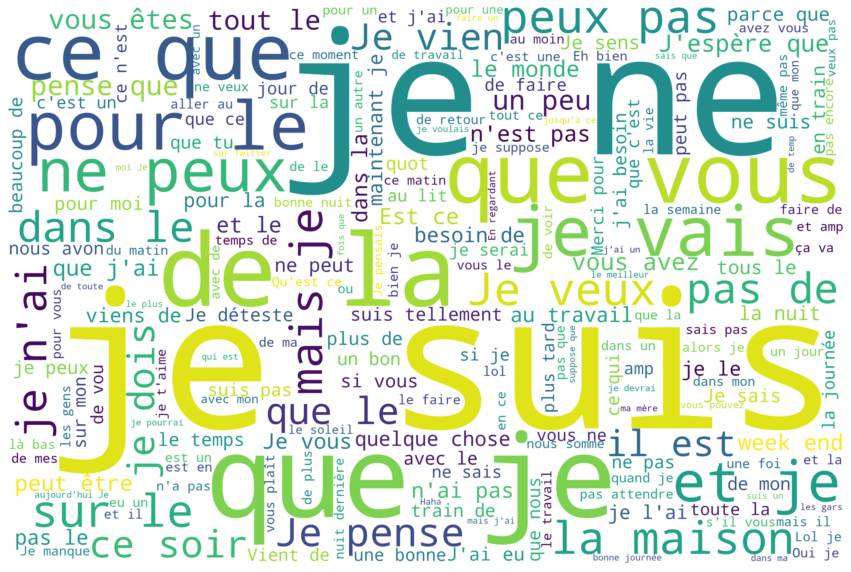

In [ ]:
text = " ".join(review for review in train_dataset.text)

stopwords = set(STOPWORDS)
stopwords.update(["br"])	

wordcloud = WordCloud(stopwords=stopwords, width= 3000, height = 2000,background_color="white").generate(text)

plt.figure(figsize=(15,11))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Since You do not need to be fluent in French, I would translate few words to get a closer look, but these are **mostly Stopwords**
- Je -> I
- Suis -> Am
- Que -> Than

# After deleting some Stopwords

In [ ]:
stopwords = set(STOPWORDS)
stopwords.update(["amp","quot","je","suis", "que", "Je","br","alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", "hors", "ici", "il", "ils", "je	juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", "mien", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "ou", "où", "par", "parce", "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez	sujet", "sur", "ta", "tandis", "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "voient", "vont", "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être"])

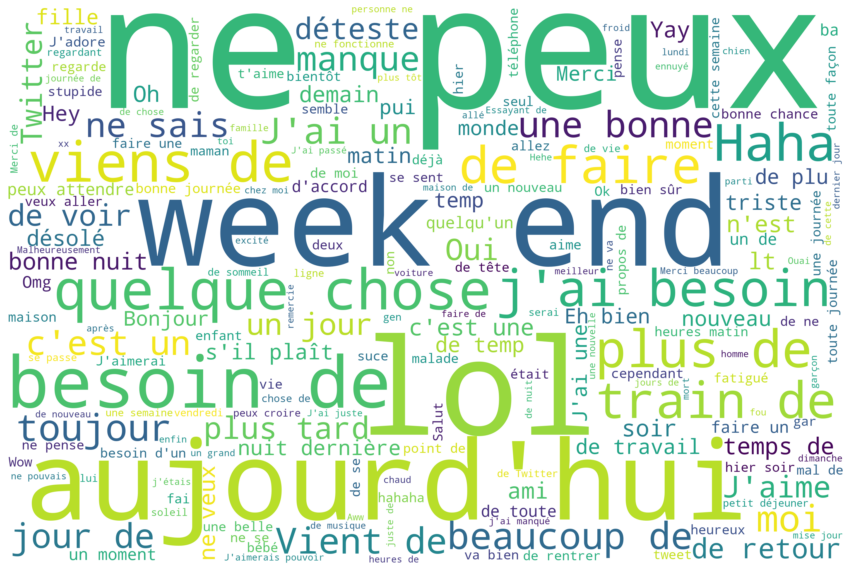

In [ ]:
text = " ".join(review for review in train_dataset.text)

wordcloud = WordCloud(stopwords=stopwords, width= 3000, height = 2000,background_color="white").generate(text)

plt.figure(figsize=(15,11))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

There is also a few English words that are widely spread in conversations like LOL, Haha etc. I will translate some french words here as well
- aujourd'hui -> Today
- Peux -> Can
- beaucoup -> a lot/many

Many of them are similar with English words after translation